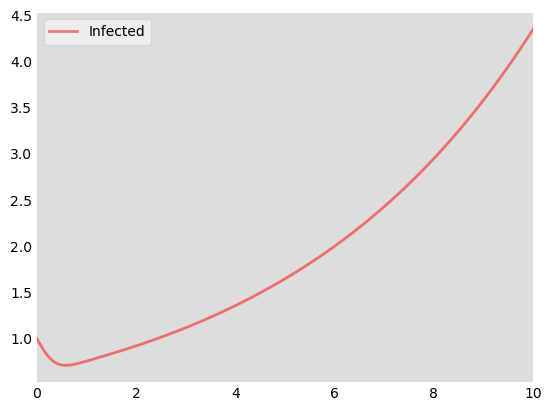

In [121]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
lamb = 94947554.90683231
mur = 0.0036139630390143737
alpha = 1.2934645340917354e-13
betar = 1.4456588706454322e-11
gamma = 7.602243456791881e-11
mua = 0.0036139630390143737
betaa = 9.105023408155239e-11
ke = 5.891
epsilon = 0.00040809473488108227
delta = 1.0
f = 0.08751020482882284
ps = 4946.400000000001
pl = 4946.400000000001
c = 141.5
kappai = 2.4
ft = 0.5
kappae = 240.0
kf = 6.051422240886086e-13
kr = 8640
kpx = 4.937336165356041e-09
kmx = 8640
kpc = 70.38
kmc = 0.1524
ka = 1.389
kd = 864
rt = 963752597071.1776
betar/=10
r0 = betar*lamb/(delta*f*mur)*(epsilon*pl+(1-epsilon)*f*ps)/(c+(1-ft)*kappai)
TR0, TA0, E10, E20, E30, IS0, IL0, V0, VP0, B10, R0 = lamb/mur, 0, 0, 0, 0, 1, 0, 0, 0, 0, rt
t = np.linspace(0, 10, 1001)
def deriv(y, t, lamb, mur, alpha,betar,gamma, mua, betaa,ke,epsilon,delta,f,ps,pl,c,kappai,ft,kappae,kf,kr,kpx,kmx,kpc,kmc,ka,kd,rt):
    TR, TA, E1, E2, E3, IS, IL, V, VP, B1, R = y
    flow = np.array([lamb-mur*TR-alpha*V*TR-betar*V*TR,alpha*V*TR+gamma*V*TA-mua*TA-betaa*V*TA,betar*V*TR+betaa*V*TA-ke*E1,ke*E1-ke*E2,ke*E2-ke*E3,(1-epsilon)*ke*E3-delta*IS,epsilon*ke*E3-f*delta*IL,ps*IS+pl*IL-c*V-kappai*V+ft*kappae*VP-1*kf*R*V+kr*B1,kappai*V-kappae*VP,1*kf*R*V-kr*B1,0])
    flow[-1] = -flow[-2]
    return flow[0], flow[1], flow[2], flow[3], flow[4], flow[5], flow[6], flow[7], flow[8], flow[9], flow[10]
y0 = TR0, TA0, E10, E20, E30, IS0, IL0, V0, VP0, B10, R0
ret = odeint(deriv, y0, t, args=(lamb, mur, alpha,betar,gamma, mua, betaa,ke,epsilon,delta,f,ps,pl,c,kappai,ft,kappae,kf,kr,kpx,kmx,kpc,kmc,ka,kd,rt))
TR, TA, E1, E2, E3, IS, IL, V, VP, B1, R = ret.T
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, IS, 'r', alpha=0.5, lw=2, label='Infected')
ax.set_yscale('linear')
ax.set_xlim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [122]:
delta*np.log(2)*(r0-1)

0.2232859018154593

In [123]:
1/(r0-1)

3.104303383797225

In [124]:
IS[300]/IS[250]

1.1016368843434867